<span style = "color:orange; font-size: 24pt ">Computer Assignment #4</span>


<span style = "color:Peru; font-size: 16pt "> Aryan Soltani Mohammadi</span>

<span style = "color:Peru; font-size: 12pt ">810198558</span>

In [1]:
import pandas as pd

In [2]:
FILE_PATH = "dataset.csv"
RELEASE_YEAR = "release_year"
GENRE_COL = "listed_in"
PREDICTION = "type"

In [3]:
data_movies = pd.read_csv(FILE_PATH)

In [4]:
data_movies

,type,title,cast,country,release_year,listed_in,description
0,Movie,Dick Johnson Is Dead,NaN,United States,2020,Documentaries,"As her father nears the end of his life, filmm..."
1,TV Show,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,TV Show,Ganglands,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,TV Show,Jailbirds New Orleans,NaN,NaN,2021,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,TV Show,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...
11054,TV Show,X-Men: Evolution,"Noel Fisher, Vincent Gale, Christopher Judge, ...",United States,2000,"Action-Adventure, Animation, Kids",X-Men: Evolution features the team as teenager...
11055,TV Show,Smart Guy,"Tahj Mowry, John Jones, Jason Weaver, Essence ...",United States,1996,"Comedy, Coming of Age, Kids",A genius tries to fit in as a high school soph...
11056,TV Show,Disney Kirby Buckets,"Jacob Bertrand, Mekai Curtis, Cade Sutton, Oli...",United States,2014,"Action-Adventure, Comedy, Coming of Age",Welcome to Kirby's world! It's rude and sketchy.
11057,TV Show,Disney Mech-X4,"Nathaniel Potvin, Raymond Cham, Kamran Lucas, ...",Canada,2016,"Action-Adventure, Comedy, Science Fiction",Ryan discovers his ability to control a giant ...




<span style = "color: DarkOrange; font-size: 25pt"> Phase #0: </span> 






<span style = "color: Tomato; font-size: 20pt"> 1) </span>
Utilization of describe and info method for analysing data's charactiristics.
The describe method only print some info about numerical data, the only numerical time in this data is release date, thus it just show statistical output about it.
As we could see in the output movies has started from 1925 till 2021 and they are mostly after 2013 and the average is 2014.

In [5]:
data_movies.describe()

,release_year
count,11059.000000
mean,2014.209603
std,8.959517
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


info just print some info about the data. For instance, number of entries, type of columns, name of columns, number of Non-Null of each data and etc.

In [6]:
data_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11059 entries, 0 to 11058
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          11059 non-null  object
 1   title         11059 non-null  object
 2   cast          9694 non-null   object
 3   country       8364 non-null   object
 4   release_year  11059 non-null  int64 
 5   listed_in     11059 non-null  object
 6   description   11059 non-null  object
dtypes: int64(1), object(6)
memory usage: 604.9+ KB


<span style = "color: Tomato; font-size: 20pt"> 2) </span>

This part precent of missing data in each column has been printed.

In [7]:
for column in data_movies:
    num_na = list(data_movies[column].isna()).count(True)
    print(str(round((num_na / len(data_movies[column])), 4) * 100) + "%", "of data in", column, "column", "is missing(NA)", sep = ' ')
    

0.0% of data in type column is missing(NA)
0.0% of data in title column is missing(NA)
12.34% of data in cast column is missing(NA)
24.37% of data in country column is missing(NA)
0.0% of data in release_year column is missing(NA)
0.0% of data in listed_in column is missing(NA)
0.0% of data in description column is missing(NA)



<span style = "color: DarkOrange; font-size: 25pt"> Phase #1: </span> 


<span style = "color: Tomato; font-size: 20pt"> 1) </span>

There are alot of approaches for filling the missing data, but we explain two of them:

<span style = "color:red"> 1- dropping rows with atleast one NAN value:</span>

In this approach rows which contains atleast one NAN will omit. The drawback of this approach is that, those rows may contain some info of other catogories, and by doing this action we loose this data.

<span style = "color:red"> 2-  Filling NANs in each coloumn with the most frequent item in category of that column:</span>

In this approach with don't loose any data but if some catogory has alot of NAN, alot of meaningless data would add to the dataframe.

I decided to use replacing each NaN with the most frequent value in its category to avoid loosing data, because atleast 25% of data would get lost with the ommiting approach.

In [8]:
for column in data_movies:
    frequent_item = data_movies[column].mode()[0]
    data_movies[column].fillna(frequent_item, inplace = True)
data_movies

,type,title,cast,country,release_year,listed_in,description
0,Movie,Dick Johnson Is Dead,David Attenborough,United States,2020,Documentaries,"As her father nears the end of his life, filmm..."
1,TV Show,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,TV Show,Ganglands,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,TV Show,Jailbirds New Orleans,David Attenborough,United States,2021,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,TV Show,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...
11054,TV Show,X-Men: Evolution,"Noel Fisher, Vincent Gale, Christopher Judge, ...",United States,2000,"Action-Adventure, Animation, Kids",X-Men: Evolution features the team as teenager...
11055,TV Show,Smart Guy,"Tahj Mowry, John Jones, Jason Weaver, Essence ...",United States,1996,"Comedy, Coming of Age, Kids",A genius tries to fit in as a high school soph...
11056,TV Show,Disney Kirby Buckets,"Jacob Bertrand, Mekai Curtis, Cade Sutton, Oli...",United States,2014,"Action-Adventure, Comedy, Coming of Age",Welcome to Kirby's world! It's rude and sketchy.
11057,TV Show,Disney Mech-X4,"Nathaniel Potvin, Raymond Cham, Kamran Lucas, ...",Canada,2016,"Action-Adventure, Comedy, Science Fiction",Ryan discovers his ability to control a giant ...


As we can see NaN in the country category has changed to United States, and in cast has changed to David Attenbrough.

<span style = "color: Tomato; font-size: 20pt"> 2) </span>

Normalization change data to a number which is between 0 and 1, and the equation of this change has written below.
$$a_{new} = \frac{a_{old} - a_{min}}{a_{max} - a_{min}}$$

Standardization on the other hand change the data to make the mean 0 and standard deviation to 1. Also equation has written below.
$$a_{new} = \frac{a_{old} - \mu}{\sigma}$$

In [9]:
min_year = data_movies[RELEASE_YEAR].min()
max_year = data_movies[RELEASE_YEAR].max()
for i in range(len(data_movies[RELEASE_YEAR])):
    data_movies.loc[i, RELEASE_YEAR] = (data_movies.loc[i, RELEASE_YEAR] - min_year) / (max_year - min_year)
data_movies


,type,title,cast,country,release_year,listed_in,description
0,Movie,Dick Johnson Is Dead,David Attenborough,United States,0.989583,Documentaries,"As her father nears the end of his life, filmm..."
1,TV Show,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,1.000000,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,TV Show,Ganglands,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,1.000000,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,TV Show,Jailbirds New Orleans,David Attenborough,United States,1.000000,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,TV Show,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,1.000000,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...
11054,TV Show,X-Men: Evolution,"Noel Fisher, Vincent Gale, Christopher Judge, ...",United States,0.781250,"Action-Adventure, Animation, Kids",X-Men: Evolution features the team as teenager...
11055,TV Show,Smart Guy,"Tahj Mowry, John Jones, Jason Weaver, Essence ...",United States,0.739583,"Comedy, Coming of Age, Kids",A genius tries to fit in as a high school soph...
11056,TV Show,Disney Kirby Buckets,"Jacob Bertrand, Mekai Curtis, Cade Sutton, Oli...",United States,0.927083,"Action-Adventure, Comedy, Coming of Age",Welcome to Kirby's world! It's rude and sketchy.
11057,TV Show,Disney Mech-X4,"Nathaniel Potvin, Raymond Cham, Kamran Lucas, ...",Canada,0.947917,"Action-Adventure, Comedy, Science Fiction",Ryan discovers his ability to control a giant ...


We used Normalization, because standardization is usally used when the data distribution is mostly gaussian, and the release year data is not gaussian and it is close to uniform distribution.

<span style = "color: Tomato; font-size: 20pt"> 3) </span>

There are alot of approaches for converting catagorical data to numberical, but we explain two of them:

<span style = "color:red"> 1- Label Encoding or Ordinal Encoding:</span>

In this approach each label will be mapped to an integer. This is method mostly used when the data has order.

<span style = "color:red"> 2-  One Hot Encoding:</span>

In this method for each label in catagorical columns we add a column, also we ommit the catagorical column. Then for each label, if the row has the feature, we write 1 otherwise 0

We used the Label Encoding, because it use much less memory than One Hot Encoding, and One Hot Encoding, works very bad in the columns with alot of labels.

In [10]:
from sklearn.preprocessing import LabelEncoder

categorical_data = ['type', 'country']
for column in categorical_data:
    label_encoder = LabelEncoder()
    label_encoder.fit(data_movies[column])
    data_movies[column] = label_encoder.transform(data_movies[column])
data_movies

,type,title,cast,country,release_year,listed_in,description
0,0,Dick Johnson Is Dead,David Attenborough,608,0.989583,Documentaries,"As her father nears the end of his life, filmm..."
1,1,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",430,1.000000,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,1,Ganglands,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",608,1.000000,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,1,Jailbirds New Orleans,David Attenborough,608,1.000000,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,1,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",254,1.000000,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...
11054,1,X-Men: Evolution,"Noel Fisher, Vincent Gale, Christopher Judge, ...",608,0.781250,"Action-Adventure, Animation, Kids",X-Men: Evolution features the team as teenager...
11055,1,Smart Guy,"Tahj Mowry, John Jones, Jason Weaver, Essence ...",608,0.739583,"Comedy, Coming of Age, Kids",A genius tries to fit in as a high school soph...
11056,1,Disney Kirby Buckets,"Jacob Bertrand, Mekai Curtis, Cade Sutton, Oli...",608,0.927083,"Action-Adventure, Comedy, Coming of Age",Welcome to Kirby's world! It's rude and sketchy.
11057,1,Disney Mech-X4,"Nathaniel Potvin, Raymond Cham, Kamran Lucas, ...",59,0.947917,"Action-Adventure, Comedy, Science Fiction",Ryan discovers his ability to control a giant ...


<span style = "color: Tomato; font-size: 20pt"> 4) </span>

We just explain two of these methods that use for using multi-label columns.


<span style = "color:red"> 1- Binary relevance:</span>

This method is similar to One Hot Encoding, which for every label(in this problem genre) we add a new column, and the number written in this columns are just 0 and 1s, also we remove the multi-label comlumn as well.

<span style = "color:red"> 2-  Label powerset:</span>

It give each combination of labels a unique number.

At first we used Label powerset in this problem, because there are alot of generes and by using Binary Relevance there will be alot of columns, thus usage of memory would increase.

In [11]:
all_genres = set([])
ind = 0
for str_genre in data_movies[GENRE_COL]:
    list_genre = str_genre.split(',')
    list_genre.sort()
    list_genre = "".join(list_genre)
    data_movies.loc[ind, GENRE_COL] = list_genre

label_encoder = LabelEncoder()
label_encoder.fit(data_movies[GENRE_COL])
data_movies[GENRE_COL] = label_encoder.transform(data_movies[GENRE_COL])
data_movies

,type,title,cast,country,release_year,listed_in,description
0,0,Dick Johnson Is Dead,David Attenborough,608,0.989583,0,"As her father nears the end of his life, filmm..."
1,1,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",430,1.000000,750,"After crossing paths at a party, a Cape Town t..."
2,1,Ganglands,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",608,1.000000,469,To protect his family from a powerful drug lor...
3,1,Jailbirds New Orleans,David Attenborough,608,1.000000,567,"Feuds, flirtations and toilet talk go down amo..."
4,1,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",254,1.000000,729,In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...
11054,1,X-Men: Evolution,"Noel Fisher, Vincent Gale, Christopher Judge, ...",608,0.781250,118,X-Men: Evolution features the team as teenager...
11055,1,Smart Guy,"Tahj Mowry, John Jones, Jason Weaver, Essence ...",608,0.739583,409,A genius tries to fit in as a high school soph...
11056,1,Disney Kirby Buckets,"Jacob Bertrand, Mekai Curtis, Cade Sutton, Oli...",608,0.927083,122,Welcome to Kirby's world! It's rude and sketchy.
11057,1,Disney Mech-X4,"Nathaniel Potvin, Raymond Cham, Kamran Lucas, ...",59,0.947917,124,Ryan discovers his ability to control a giant ...


In [12]:
EXTRA_CHARACTERS = ['the', 'of', 'in', 'and', 'to', 'my', 'with', 'for', 'an', 'his', 'her', 'as', 'this', 'on', 'when', 'from', 'is', 'who', 'their', 'that', 'after', 'he', 'she', 'by', 'at', 'are' ,'they']
NUMBER_PICK = 10

from sklearn.feature_extraction.text import CountVectorizer

rest_col = ['title', 'cast', 'description']
for col in rest_col:
    list_str = data_movies[col].tolist()
    vectorizer = CountVectorizer()
    vectorizer.fit(list_str)
    vectorized = vectorizer.transform(list_str)
    count_values = vectorized.toarray().sum(axis=0)
    vocab = vectorizer.vocabulary_
    most_occur = sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)
    most_occur_new = [pr for pr in most_occur  if (not pr[1] in EXTRA_CHARACTERS)]
    most_occur = most_occur_new[0:NUMBER_PICK - 1]
    
    words_needed = [pr[1] for pr in most_occur]
    print(words_needed)
    
    vectorizer2 = CountVectorizer()
    vectorizer2.fit(words_needed)
    vectorized = vectorizer2.transform(list_str)
    
    data_movies[words_needed] = vectorized.toarray()
    
data_movies = data_movies.drop(rest_col, axis = 1)

['love', 'world', 'man', 'you', 'life', 'story', 'little', 'christmas', 'series']
['david', 'attenborough', 'michael', 'john', 'james', 'lee', 'paul', 'kim', 'de']
['life', 'new', 'but', 'up', 'into', 'world', 'young', 'family', 'series']


<span style = "color: Tomato; font-size: 16pt">Extracting features from context</span>

The ten most occurance has listed above. Some words has been ommited, because they don't show anything. Extracting more features help learning become more accurate, but it make the process of learning very slow, and it takes alot of memory. 

In [13]:
data_movies

,type,country,release_year,listed_in,love,world,man,you,life,story,...,lee,paul,kim,de,new,but,up,into,young,family
0,0,608,0.989583,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1,430,1.000000,750,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,608,1.000000,469,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
3,1,608,1.000000,567,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,254,1.000000,729,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11054,1,608,0.781250,118,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
11055,1,608,0.739583,409,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11056,1,608,0.927083,122,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
11057,1,59,0.947917,124,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<span style = "color: Tomato; font-size: 16pt">Calculating and Showing plots related to information gain</span>

As we can see in the plot below, best feature for choosing is list_in because its information gain is by far the maximum, and also other features are near to each other and very near to 0.

country 0.1795370958311494
release_year 0.0410653793969491
listed_in 0.9914472885406285
love 0.0019870802835626478
world 0.0430878000980196
man 5.44842131920964e-05
you 0.00011753928782765044
life 0.0018561049727945367
story 0.009016521130404853
little 0.0005490144348123671
christmas 0.00034548026613856475
series 0.003415403090084701
david 0.018039169426608215
attenborough 0.01140915342165072
michael 0.0010019991650691562
john 0.0010045972160983574
james 0.003572980575510032
lee 0.0049301766590572615
paul 0.004385305666079309
kim 0.0027430843577105346
de 0.0008736831598504802
new 0.0011734871097095478
but 0.0005592416768586128
up 0.002983436622603919
into 0.004291116457245003
young 0.00034184172813600533
family 0.013637680366291538


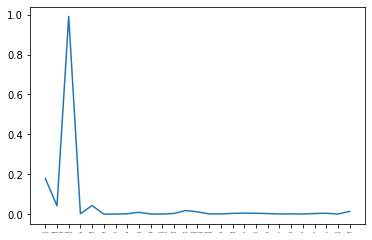

In [14]:
from math import log2
import matplotlib.pyplot as plt

arr_gain = []
name_type = []

arr_1 = [1 for type_prop in data_movies['type'] if type_prop == 1]
nu_1 = len(arr_1)
nu_0 = len(data_movies['type']) - nu_1
p_0 = nu_0 / (nu_0 + nu_1)
p_1 = nu_1 / (nu_0 + nu_1)
entropy = -(log2(p_0) * p_0 + log2(p_1) * p_1)

for col in data_movies:
    if(col == PREDICTION):
        continue
    diff_type = set(data_movies[col])
    cnt = [0 for i in range(2)]
    cnt[0] = {type_prop : 0 for type_prop in diff_type}
    cnt[1] = {type_prop : 0 for type_prop in diff_type}
    for i in range(len(data_movies[col])):
        cnt[data_movies.loc[i, PREDICTION]][data_movies.loc[i, col]] += 1
    gain_info = 0
    num_info = 0
    for type_prop in diff_type:
        p_0 = cnt[0][type_prop] / (cnt[0][type_prop] + cnt[1][type_prop])
        p_1 = 1 - p_0
        if(p_0 == 0 or p_1 == 0):
            gain_info_now = 0
        else:
            gain_info_now = -(log2(p_0) * p_0 + log2(p_1) * p_1)
        gain_info += gain_info_now * (cnt[0][type_prop] + cnt[1][type_prop])
        num_info += cnt[0][type_prop] + cnt[1][type_prop]
    
    arr_gain.append(entropy - gain_info / num_info)
    name_type.append(col)
    
    
    print(col, entropy - gain_info / num_info, sep = ' ')

plt.rc('xtick', labelsize=2) 
plt.plot(name_type, arr_gain)
    


<span style = "color: DarkOrange; font-size: 25pt"> Phase #2: </span> 


In [15]:

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

def decision_tree(ratio, data_movies):
    data_have = data_movies.drop(PREDICTION, axis = 1)
    data_pred = data_movies[PREDICTION]
    data_train, data_test, pred_train, pred_test = train_test_split(data_have, data_pred, test_size=ratio)
    classifier = DecisionTreeClassifier()
    classifier.fit(data_train, pred_train)
    print("For this decision tree max_depth is: ", classifier.tree_.max_depth, sep = ' ')
#     print("For this decision tree min_samples_split is: ", classifier.tree_.min_samples_split, sep = ' ')
    pred = classifier.predict(data_test)
    decision_tree_params = [{'max_depth': range(1, 8), 'min_samples_split': range(2, 5)}]
    clf = GridSearchCV(classifier, decision_tree_params, cv = 10, scoring='accuracy')
    clf.fit(data_train, pred_train)
    print(clf.best_params_)
    print(confusion_matrix(pred_test, pred))

In [16]:
decision_tree(0.3, data_movies)

For this decision tree max_depth is:  14
{'max_depth': 6, 'min_samples_split': 2}
[[1838    6]
 [  12 1462]]


In [17]:
decision_tree(0.02, data_movies)

For this decision tree max_depth is:  14
{'max_depth': 7, 'min_samples_split': 2}
[[120   2]
 [  0 100]]


In [18]:
decision_tree(0.6, data_movies)

For this decision tree max_depth is:  14
{'max_depth': 7, 'min_samples_split': 4}
[[3671   23]
 [  53 2889]]


max depth of the tree shows at what depth the spliting will finish and when training data is 98% as we can see the depth is 15 and for other we can see the max depth as well in above output.

min samples split shows the minimum sample in a node we need in order to split the samples. 

<span style = "color: Tomato; font-size: 20pt"> 1) </span>

First we choose 70% for training because we want to avoid underfiting and overfiting, and by trial and error it seems like it is a decent choice.

By changing train data ratio to 98% it gets more accurate, but usually high training ratio could cause overfitting.

By changing train data ratio to 40% results get worse cause of underfitting occurs.

Underfiting occurs when the training data ratio is too low, thus we don't have enough information in these circumstances.

Overfitting occurs when the training data ratio is too high, therefore it is not enough flexible and it just have great result in training data.


Accuracy Test: 0.6666666666666666
Accuracy Train: 0.7059149211036264
[[101  10]
 [ 64  47]]
Accuracy Test: 0.6981981981981982
Accuracy Train: 0.7052689858817016
Accuracy Test: 0.8108108108108109
Accuracy Train: 0.794684875888161
Accuracy Test: 0.8378378378378378
Accuracy Train: 0.8423918058503276
Accuracy Test: 0.9099099099099099
Accuracy Train: 0.9289471255882624
Accuracy Test: 0.9864864864864865
Accuracy Train: 0.9935406477807511
Accuracy Test: 0.9954954954954955
Accuracy Train: 0.9934483713204761
Accuracy Test: 0.9954954954954955
Accuracy Train: 0.9986158530958752
Accuracy Test: 0.9954954954954955
Accuracy Train: 0.9989849589369751
Accuracy Test: 0.990990990990991
Accuracy Train: 0.9990772353972501
[[115   2]
 [  0 105]]
Accuracy Test: 1.0
Accuracy Train: 0.9990772353972501
Accuracy Test: 0.9954954954954955
Accuracy Train: 0.9994463412383501
Accuracy Test: 1.0
Accuracy Train: 0.99981544707945
Accuracy Test: 1.0
Accuracy Train: 0.99981544707945
Accuracy Test: 0.9954954954954955
Accur

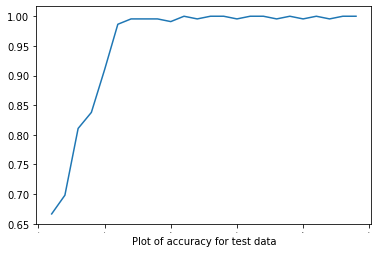

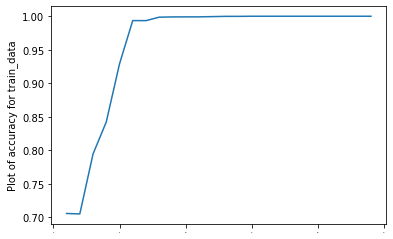

In [19]:
from sklearn import metrics
arr_accuracy = []
arr_accuracy2 = []
for depth in range(1, 25):
    data_have = data_movies.drop(PREDICTION, axis = 1)
    data_pred = data_movies[PREDICTION]
    data_train, data_test, pred_train, pred_test = train_test_split(data_have, data_pred, test_size=0.02)
    classifier = DecisionTreeClassifier(max_depth = depth)
    classifier.fit(data_train, pred_train)
    pred = classifier.predict(data_test)
    pred2 = classifier.predict(data_train)
    print("Accuracy Test:",metrics.accuracy_score(pred_test, pred))
    print("Accuracy Train:",metrics.accuracy_score(pred_train, pred2))
    arr_accuracy.append(metrics.accuracy_score(pred_test, pred))
    arr_accuracy2.append(metrics.accuracy_score(pred_train, pred2))
    if(depth == 1 or depth == 10 or depth == 24):
         print(confusion_matrix(pred_test, pred))
plt.plot(list(range(1, 25)), arr_accuracy)
plt.xlabel('Plot of accuracy for test data')
plt.show()
plt.plot(list(range(1, 25)), arr_accuracy2)
plt.ylabel('Plot of accuracy for train_data')
plt.show()

<span style = "color: Tomato; font-size: 20pt"> 2) </span>

As we can see in above plots, in low depth underfiting has occured and the result is not good and in the high depth usually we have overfiting but because corrolation list_in and type is very high it is not the case. But as we can see in confusion matrix in depth 19 there is 1 fault in result of depth 24 but depth 10 is completly accurate.

<span style = "color: DarkOrange; font-size: 25pt"> Phase #3: </span> 

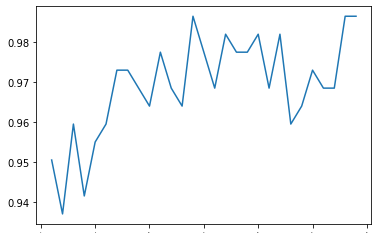

In [20]:
from sklearn.ensemble import RandomForestClassifier

data_train, data_test, pred_train, pred_test = train_test_split(data_have, data_pred, test_size=0.02)

accuracy = []

for i in range(1, 30):
    random_forest = RandomForestClassifier(n_estimators = i)
    random_forest.fit(data_train, pred_train)
    pred_forest = random_forest.predict(data_test)
    accuracy.append(metrics.accuracy_score(pred_test, pred_forest))
plt.plot(range(1, 30), accuracy)

<span style = "color: red; font-size:16pt"> n_estimatiors:</span>

Show number of trees in the random forest. As we can see in the plot by increasing it gradually the accuracy increase.

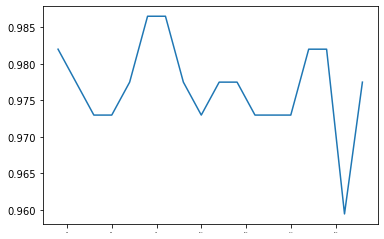

In [21]:
accuracy = []
for i in range(2, 20):
    random_forest = RandomForestClassifier(min_samples_split = i)
    random_forest.fit(data_train, pred_train)
    pred_forest = random_forest.predict(data_test)
    accuracy.append(metrics.accuracy_score(pred_test, pred_forest))
plt.plot(range(2, 20), accuracy)

<span style = "color: red; font-size:16pt"> min_samples_split</span>

Show the number of samples in each interval node that is needed to split the samples in the node. By increasing it accuracy decrease.

The result of Random Forest is better than decision tree.

High bias shows a bad prediction in both training and testing data. High variance on the other predicate the traning data perfectly, and testing data awfuly. 

Random forest variance is lower and its bias is higher than a single decision tree, because it has some number of tree that are less complex and has high bias, thus they have lower variance, and by getting average bias become more accurate. So it is good when we want a tradeoff between variance and bias. 